In [ ]:
## import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']=False
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
from keras.utils import np_utils
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('dataset/wine.csv', header = None)
cols = df.columns.tolist()
cols = cols[:-2] + cols[-1:] + cols[-2:-1]
df = df[cols]


In [289]:
df.head() # 11열과 12열의 위치를 바꿈

,0,1,2,3,4,5,6,7,8,9,10,12,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5


In [290]:
df = df.rename(columns={12:'Class'});df = df.rename(columns={11:"Tasty"})

In [291]:
list(df)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'Class', 'Tasty']

sns.pairplot(df, hue = "Tasty", vars = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title("등급 별 와인의 분포")
plt.show()

In [292]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [293]:
Y_encoded = np_utils.to_categorical(Y, 11)
Y_encoded[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [294]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=seed)

In [295]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

import os
MODEL_DIR = './model1/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model1/{epoch:02d}-{val_loss:.4f}.hdf5"

chkeckpoint = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

# 다중 분류 이용하여 와인 레벨 찾기(오차함수: categorical_crossentropy, 활성화 함수: softmax)

## history0(총 Dense 3개, 총 params 2211개, epochs = 200, batch_size = 50)

In [296]:
model = Sequential()
model.add(Dense(50, input_dim=12, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(11, activation = 'softmax'))


model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [297]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 50)                650       
_________________________________________________________________
dense_134 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_135 (Dense)            (None, 11)                286       
Total params: 2,211
Trainable params: 2,211
Non-trainable params: 0
_________________________________________________________________


In [298]:
history0 = model.fit(X_train, Y_train, validation_split=0.2, epochs = 200, batch_size= 50, verbose = 2, callbacks = [early_stopping_callback])

Train on 3637 samples, validate on 910 samples
Epoch 1/200
 - 1s - loss: 5.0975 - acc: 0.2873 - val_loss: 1.7070 - val_acc: 0.3989
Epoch 2/200
 - 0s - loss: 1.5315 - acc: 0.4303 - val_loss: 1.4636 - val_acc: 0.4231
Epoch 3/200
 - 0s - loss: 1.3264 - acc: 0.4468 - val_loss: 1.3447 - val_acc: 0.4341
Epoch 4/200
 - 0s - loss: 1.3009 - acc: 0.4358 - val_loss: 1.3334 - val_acc: 0.4363
Epoch 5/200
 - 0s - loss: 1.2900 - acc: 0.4495 - val_loss: 1.3483 - val_acc: 0.4242
Epoch 6/200
 - 0s - loss: 1.2741 - acc: 0.4553 - val_loss: 1.3189 - val_acc: 0.4495
Epoch 7/200
 - 0s - loss: 1.2656 - acc: 0.4561 - val_loss: 1.3197 - val_acc: 0.4385
Epoch 8/200
 - 0s - loss: 1.2576 - acc: 0.4589 - val_loss: 1.2962 - val_acc: 0.4253
Epoch 9/200
 - 0s - loss: 1.2506 - acc: 0.4652 - val_loss: 1.3085 - val_acc: 0.4286
Epoch 10/200
 - 0s - loss: 1.2424 - acc: 0.4622 - val_loss: 1.2634 - val_acc: 0.4637
Epoch 11/200
 - 0s - loss: 1.2335 - acc: 0.4616 - val_loss: 1.2699 - val_acc: 0.4714
Epoch 12/200
 - 0s - loss: 

Epoch 97/200
 - 0s - loss: 1.0518 - acc: 0.5560 - val_loss: 1.0909 - val_acc: 0.5264
Epoch 98/200
 - 0s - loss: 1.0462 - acc: 0.5576 - val_loss: 1.0991 - val_acc: 0.5297
Epoch 99/200
 - 0s - loss: 1.0452 - acc: 0.5604 - val_loss: 1.0913 - val_acc: 0.5264
Epoch 100/200
 - 0s - loss: 1.0628 - acc: 0.5466 - val_loss: 1.0794 - val_acc: 0.5330
Epoch 101/200
 - 0s - loss: 1.0530 - acc: 0.5535 - val_loss: 1.0813 - val_acc: 0.5418
Epoch 102/200
 - 0s - loss: 1.0512 - acc: 0.5483 - val_loss: 1.0854 - val_acc: 0.5330
Epoch 103/200
 - 0s - loss: 1.0490 - acc: 0.5466 - val_loss: 1.0846 - val_acc: 0.5374
Epoch 104/200
 - 0s - loss: 1.0471 - acc: 0.5601 - val_loss: 1.0953 - val_acc: 0.5429
Epoch 105/200
 - 0s - loss: 1.0432 - acc: 0.5642 - val_loss: 1.0818 - val_acc: 0.5319
Epoch 106/200
 - 0s - loss: 1.0482 - acc: 0.5546 - val_loss: 1.0967 - val_acc: 0.5231
Epoch 107/200
 - 0s - loss: 1.0455 - acc: 0.5587 - val_loss: 1.0772 - val_acc: 0.5363
Epoch 108/200
 - 0s - loss: 1.0435 - acc: 0.5560 - val_lo

Epoch 193/200
 - 0s - loss: 1.0230 - acc: 0.5692 - val_loss: 1.0744 - val_acc: 0.5275
Epoch 194/200
 - 0s - loss: 1.0197 - acc: 0.5760 - val_loss: 1.0821 - val_acc: 0.5242
Epoch 195/200
 - 0s - loss: 1.0214 - acc: 0.5675 - val_loss: 1.0743 - val_acc: 0.5286
Epoch 196/200
 - 0s - loss: 1.0169 - acc: 0.5719 - val_loss: 1.1015 - val_acc: 0.5264
Epoch 197/200
 - 0s - loss: 1.0261 - acc: 0.5719 - val_loss: 1.0822 - val_acc: 0.5297
Epoch 198/200
 - 0s - loss: 1.0216 - acc: 0.5584 - val_loss: 1.0932 - val_acc: 0.5176
Epoch 199/200
 - 0s - loss: 1.0195 - acc: 0.5645 - val_loss: 1.0829 - val_acc: 0.5242
Epoch 200/200
 - 0s - loss: 1.0233 - acc: 0.5648 - val_loss: 1.0872 - val_acc: 0.5297


In [299]:
print("\n Accurcay: %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n\n")
print("\n Accurcay: %.4f" % (model.evaluate(X_test, Y_test)[1]))

4547/4547 [==============================] - 0s 19us/step

 Accurcay: 0.5531



1950/1950 [==============================] - 0s 16us/step

 Accurcay: 0.5026


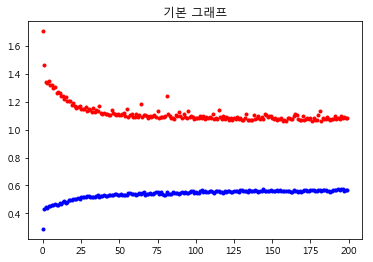

In [300]:
y_vloss=history0.history['val_loss']
y_acc=history0.history['acc']
x_len = np.arange(len(y_acc))
plt.title("기본 그래프")
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

## histroy1(총 Dense 5개, 총 params 2209개, epochs = 500, batch_size = 30)

In [301]:
model = Sequential()
model.add(Dense(35, input_dim=12, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(11, activation = 'softmax'))



model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [302]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 35)                455       
_________________________________________________________________
dense_137 (Dense)            (None, 27)                972       
_________________________________________________________________
dense_138 (Dense)            (None, 15)                420       
_________________________________________________________________
dense_139 (Dense)            (None, 13)                208       
_________________________________________________________________
dense_140 (Dense)            (None, 11)                154       
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [303]:
history1 = model.fit(X_train, Y_train, validation_split=0.2, epochs = 500, batch_size= 30, verbose = 2, callbacks = [early_stopping_callback])

Train on 3637 samples, validate on 910 samples
Epoch 1/500
 - 1s - loss: 3.4214 - acc: 0.4119 - val_loss: 1.3777 - val_acc: 0.4066
Epoch 2/500
 - 0s - loss: 1.3119 - acc: 0.4319 - val_loss: 1.3517 - val_acc: 0.4143
Epoch 3/500
 - 0s - loss: 1.2641 - acc: 0.4476 - val_loss: 1.2874 - val_acc: 0.4275
Epoch 4/500
 - 0s - loss: 1.2464 - acc: 0.4482 - val_loss: 1.2616 - val_acc: 0.4264
Epoch 5/500
 - 0s - loss: 1.2304 - acc: 0.4567 - val_loss: 1.2418 - val_acc: 0.4253
Epoch 6/500
 - 0s - loss: 1.2146 - acc: 0.4625 - val_loss: 1.2437 - val_acc: 0.4275
Epoch 7/500
 - 0s - loss: 1.2056 - acc: 0.4713 - val_loss: 1.2468 - val_acc: 0.4670
Epoch 8/500
 - 0s - loss: 1.1913 - acc: 0.4762 - val_loss: 1.2040 - val_acc: 0.4484
Epoch 9/500
 - 0s - loss: 1.2040 - acc: 0.4831 - val_loss: 1.2021 - val_acc: 0.4659
Epoch 10/500
 - 0s - loss: 1.1798 - acc: 0.4968 - val_loss: 1.1826 - val_acc: 0.4736
Epoch 11/500
 - 0s - loss: 1.1717 - acc: 0.4952 - val_loss: 1.1779 - val_acc: 0.4560
Epoch 12/500
 - 0s - loss: 

Epoch 97/500
 - 0s - loss: 1.0358 - acc: 0.5466 - val_loss: 1.1383 - val_acc: 0.4879
Epoch 98/500
 - 0s - loss: 1.0333 - acc: 0.5549 - val_loss: 1.0972 - val_acc: 0.5297
Epoch 99/500
 - 0s - loss: 1.0263 - acc: 0.5609 - val_loss: 1.0992 - val_acc: 0.5264
Epoch 100/500
 - 0s - loss: 1.0275 - acc: 0.5560 - val_loss: 1.1225 - val_acc: 0.5165
Epoch 101/500
 - 0s - loss: 1.0378 - acc: 0.5521 - val_loss: 1.0793 - val_acc: 0.5286
Epoch 102/500
 - 0s - loss: 1.0318 - acc: 0.5623 - val_loss: 1.1151 - val_acc: 0.5253
Epoch 103/500
 - 0s - loss: 1.0258 - acc: 0.5551 - val_loss: 1.0785 - val_acc: 0.5165
Epoch 104/500
 - 0s - loss: 1.0281 - acc: 0.5576 - val_loss: 1.0863 - val_acc: 0.5352
Epoch 105/500
 - 0s - loss: 1.0261 - acc: 0.5576 - val_loss: 1.1081 - val_acc: 0.5132
Epoch 106/500
 - 0s - loss: 1.0385 - acc: 0.5491 - val_loss: 1.0992 - val_acc: 0.5198
Epoch 107/500
 - 0s - loss: 1.0465 - acc: 0.5425 - val_loss: 1.1032 - val_acc: 0.5209
Epoch 108/500
 - 0s - loss: 1.0327 - acc: 0.5576 - val_lo

Epoch 193/500
 - 0s - loss: 0.9977 - acc: 0.5766 - val_loss: 1.0841 - val_acc: 0.5176
Epoch 194/500
 - 0s - loss: 0.9925 - acc: 0.5724 - val_loss: 1.0825 - val_acc: 0.5121
Epoch 195/500
 - 0s - loss: 0.9963 - acc: 0.5714 - val_loss: 1.0788 - val_acc: 0.5418
Epoch 196/500
 - 0s - loss: 0.9881 - acc: 0.5779 - val_loss: 1.1397 - val_acc: 0.5055
Epoch 197/500
 - 0s - loss: 0.9998 - acc: 0.5733 - val_loss: 1.0892 - val_acc: 0.5110
Epoch 198/500
 - 0s - loss: 0.9840 - acc: 0.5752 - val_loss: 1.0836 - val_acc: 0.5187
Epoch 199/500
 - 0s - loss: 0.9916 - acc: 0.5766 - val_loss: 1.0904 - val_acc: 0.5187
Epoch 200/500
 - 0s - loss: 0.9912 - acc: 0.5727 - val_loss: 1.0811 - val_acc: 0.5209
Epoch 201/500
 - 0s - loss: 0.9895 - acc: 0.5722 - val_loss: 1.0784 - val_acc: 0.5077
Epoch 202/500
 - 0s - loss: 0.9924 - acc: 0.5823 - val_loss: 1.0845 - val_acc: 0.5231
Epoch 203/500
 - 0s - loss: 0.9891 - acc: 0.5782 - val_loss: 1.0809 - val_acc: 0.5198
Epoch 204/500
 - 0s - loss: 0.9978 - acc: 0.5727 - val

In [304]:
print("\n Accurcay: %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n\n")
print("\n Accurcay: %.4f" % (model.evaluate(X_test, Y_test)[1]))

4547/4547 [==============================] - 0s 20us/step

 Accurcay: 0.5795



1950/1950 [==============================] - 0s 17us/step

 Accurcay: 0.5021


##### 참고
predictions = model.predict(X_test)
predictions[1]
np.argmax(predictions[1])

## history2(총 Dense 3개, 총 params 23811개, epochs = 500, batch_size = 30)

In [305]:
model = Sequential()
model.add(Dense(200, input_dim=12, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(11, activation = 'softmax'))


model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [306]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 200)               2600      
_________________________________________________________________
dense_142 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_143 (Dense)            (None, 11)                1111      
Total params: 23,811
Trainable params: 23,811
Non-trainable params: 0
_________________________________________________________________


In [307]:
history2 = model.fit(X_train, Y_train, validation_split=0.2, epochs = 500, batch_size= 30, verbose = 2, callbacks = [early_stopping_callback])

Train on 3637 samples, validate on 910 samples
Epoch 1/500
 - 1s - loss: 2.3151 - acc: 0.3789 - val_loss: 1.4626 - val_acc: 0.4231
Epoch 2/500
 - 0s - loss: 1.3055 - acc: 0.4592 - val_loss: 1.2811 - val_acc: 0.4286
Epoch 3/500
 - 0s - loss: 1.3396 - acc: 0.4449 - val_loss: 1.3995 - val_acc: 0.4209
Epoch 4/500
 - 0s - loss: 1.2661 - acc: 0.4614 - val_loss: 1.2597 - val_acc: 0.4769
Epoch 5/500
 - 0s - loss: 1.2230 - acc: 0.4845 - val_loss: 1.3978 - val_acc: 0.3934
Epoch 6/500
 - 0s - loss: 1.2329 - acc: 0.4779 - val_loss: 1.1790 - val_acc: 0.4659
Epoch 7/500
 - 0s - loss: 1.2589 - acc: 0.4759 - val_loss: 1.3224 - val_acc: 0.4385
Epoch 8/500
 - 0s - loss: 1.2100 - acc: 0.4773 - val_loss: 1.1831 - val_acc: 0.4791
Epoch 9/500
 - 0s - loss: 1.2041 - acc: 0.4933 - val_loss: 1.5566 - val_acc: 0.3835
Epoch 10/500
 - 0s - loss: 1.2144 - acc: 0.5067 - val_loss: 1.2116 - val_acc: 0.4747
Epoch 11/500
 - 0s - loss: 1.1692 - acc: 0.5045 - val_loss: 1.2234 - val_acc: 0.4670
Epoch 12/500
 - 0s - loss: 

Epoch 97/500
 - 0s - loss: 0.9894 - acc: 0.5620 - val_loss: 1.1298 - val_acc: 0.4824
Epoch 98/500
 - 0s - loss: 0.9887 - acc: 0.5705 - val_loss: 1.1016 - val_acc: 0.5154
Epoch 99/500
 - 0s - loss: 0.9766 - acc: 0.5821 - val_loss: 1.0981 - val_acc: 0.5209
Epoch 100/500
 - 0s - loss: 0.9844 - acc: 0.5768 - val_loss: 1.0897 - val_acc: 0.4934
Epoch 101/500
 - 0s - loss: 0.9851 - acc: 0.5807 - val_loss: 1.0928 - val_acc: 0.5011
Epoch 102/500
 - 0s - loss: 0.9792 - acc: 0.5678 - val_loss: 1.0893 - val_acc: 0.5176
Epoch 103/500
 - 0s - loss: 0.9767 - acc: 0.5681 - val_loss: 1.1035 - val_acc: 0.5099
Epoch 104/500
 - 0s - loss: 0.9802 - acc: 0.5771 - val_loss: 1.1337 - val_acc: 0.4868
Epoch 105/500
 - 0s - loss: 0.9768 - acc: 0.5681 - val_loss: 1.0974 - val_acc: 0.5275
Epoch 106/500
 - 0s - loss: 0.9779 - acc: 0.5768 - val_loss: 1.1118 - val_acc: 0.4912
Epoch 107/500
 - 0s - loss: 0.9825 - acc: 0.5659 - val_loss: 1.0920 - val_acc: 0.5077
Epoch 108/500
 - 0s - loss: 0.9703 - acc: 0.5790 - val_lo

In [308]:
print("\n Accurcay: %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n\n")
print("\n Accurcay: %.4f" % (model.evaluate(X_test, Y_test)[1]))

4547/4547 [==============================] - 0s 24us/step

 Accurcay: 0.5560



1950/1950 [==============================] - 0s 21us/step

 Accurcay: 0.5082


## history3(총 Dense 3개, 총 params 2211개, epochs = 2000, batch_size = 30)

In [309]:
model = Sequential()
model.add(Dense(50, input_dim=12, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(11, activation = 'softmax'))


model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [310]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 50)                650       
_________________________________________________________________
dense_145 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_146 (Dense)            (None, 11)                286       
Total params: 2,211
Trainable params: 2,211
Non-trainable params: 0
_________________________________________________________________


In [311]:
history3 = model.fit(X_train, Y_train, validation_split=0.2, epochs = 2000, batch_size= 30, verbose = 2, callbacks = [early_stopping_callback])

Train on 3637 samples, validate on 910 samples
Epoch 1/2000
 - 1s - loss: 3.3221 - acc: 0.3654 - val_loss: 1.5380 - val_acc: 0.3352
Epoch 2/2000
 - 0s - loss: 1.3148 - acc: 0.4317 - val_loss: 1.3542 - val_acc: 0.4198
Epoch 3/2000
 - 0s - loss: 1.2972 - acc: 0.4336 - val_loss: 1.4111 - val_acc: 0.4593
Epoch 4/2000
 - 0s - loss: 1.3295 - acc: 0.4451 - val_loss: 1.3153 - val_acc: 0.4429
Epoch 5/2000
 - 0s - loss: 1.2788 - acc: 0.4550 - val_loss: 1.4100 - val_acc: 0.4758
Epoch 6/2000
 - 0s - loss: 1.2585 - acc: 0.4581 - val_loss: 1.2791 - val_acc: 0.4593
Epoch 7/2000
 - 0s - loss: 1.2294 - acc: 0.4839 - val_loss: 1.2376 - val_acc: 0.4758
Epoch 8/2000
 - 0s - loss: 1.2289 - acc: 0.4834 - val_loss: 1.2242 - val_acc: 0.4791
Epoch 9/2000
 - 0s - loss: 1.1972 - acc: 0.5067 - val_loss: 1.2155 - val_acc: 0.4824
Epoch 10/2000
 - 0s - loss: 1.2098 - acc: 0.4792 - val_loss: 1.2386 - val_acc: 0.4648
Epoch 11/2000
 - 0s - loss: 1.2250 - acc: 0.4803 - val_loss: 1.3064 - val_acc: 0.4692
Epoch 12/2000
 -

Epoch 96/2000
 - 0s - loss: 1.0430 - acc: 0.5488 - val_loss: 1.0690 - val_acc: 0.5198
Epoch 97/2000
 - 0s - loss: 1.0479 - acc: 0.5480 - val_loss: 1.0899 - val_acc: 0.5088
Epoch 98/2000
 - 0s - loss: 1.0474 - acc: 0.5606 - val_loss: 1.0657 - val_acc: 0.5275
Epoch 99/2000
 - 0s - loss: 1.0552 - acc: 0.5447 - val_loss: 1.1196 - val_acc: 0.5429
Epoch 100/2000
 - 0s - loss: 1.0527 - acc: 0.5496 - val_loss: 1.1258 - val_acc: 0.4989
Epoch 101/2000
 - 0s - loss: 1.0514 - acc: 0.5389 - val_loss: 1.0748 - val_acc: 0.5165
Epoch 102/2000
 - 0s - loss: 1.0427 - acc: 0.5505 - val_loss: 1.0814 - val_acc: 0.5286
Epoch 103/2000
 - 0s - loss: 1.0365 - acc: 0.5516 - val_loss: 1.0645 - val_acc: 0.5275
Epoch 104/2000
 - 0s - loss: 1.0513 - acc: 0.5532 - val_loss: 1.0880 - val_acc: 0.5121
Epoch 105/2000
 - 0s - loss: 1.0432 - acc: 0.5529 - val_loss: 1.0641 - val_acc: 0.5220
Epoch 106/2000
 - 0s - loss: 1.0364 - acc: 0.5507 - val_loss: 1.1121 - val_acc: 0.4956
Epoch 107/2000
 - 0s - loss: 1.0421 - acc: 0.55

Epoch 191/2000
 - 0s - loss: 1.0005 - acc: 0.5801 - val_loss: 1.0845 - val_acc: 0.5220
Epoch 192/2000
 - 0s - loss: 0.9998 - acc: 0.5634 - val_loss: 1.1106 - val_acc: 0.5286
Epoch 193/2000
 - 0s - loss: 0.9998 - acc: 0.5648 - val_loss: 1.1017 - val_acc: 0.5154
Epoch 194/2000
 - 0s - loss: 1.0045 - acc: 0.5623 - val_loss: 1.0883 - val_acc: 0.5341
Epoch 195/2000
 - 0s - loss: 1.0024 - acc: 0.5727 - val_loss: 1.0938 - val_acc: 0.5154
Epoch 196/2000
 - 0s - loss: 1.0058 - acc: 0.5631 - val_loss: 1.0984 - val_acc: 0.5176
Epoch 197/2000
 - 0s - loss: 0.9997 - acc: 0.5763 - val_loss: 1.0990 - val_acc: 0.5330
Epoch 198/2000
 - 0s - loss: 0.9952 - acc: 0.5675 - val_loss: 1.0774 - val_acc: 0.5253
Epoch 199/2000
 - 0s - loss: 0.9975 - acc: 0.5722 - val_loss: 1.0739 - val_acc: 0.5253
Epoch 200/2000
 - 0s - loss: 1.0002 - acc: 0.5722 - val_loss: 1.1149 - val_acc: 0.5198
Epoch 201/2000
 - 0s - loss: 0.9937 - acc: 0.5749 - val_loss: 1.1070 - val_acc: 0.5242
Epoch 202/2000
 - 0s - loss: 1.0085 - acc: 

In [312]:
print("\n Accurcay: %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n\n")
print("\n Accurcay: %.4f" % (model.evaluate(X_test, Y_test)[1]))

4547/4547 [==============================] - 0s 20us/step

 Accurcay: 0.5496



1950/1950 [==============================] - 0s 16us/step

 Accurcay: 0.5210


## history4(총 Dense 3개, 총 params 2211개, epochs = 500, batch_size = 5)

In [313]:
model = Sequential()
model.add(Dense(50, input_dim=12, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(11, activation = 'softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [314]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 50)                650       
_________________________________________________________________
dense_148 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_149 (Dense)            (None, 11)                286       
Total params: 2,211
Trainable params: 2,211
Non-trainable params: 0
_________________________________________________________________


In [315]:
history4 = model.fit(X_train, Y_train, validation_split=0.2, epochs = 500, batch_size= 5, verbose = 2, callbacks = [early_stopping_callback])

Train on 3637 samples, validate on 910 samples
Epoch 1/500
 - 2s - loss: 2.0034 - acc: 0.3866 - val_loss: 1.4039 - val_acc: 0.3374
Epoch 2/500
 - 1s - loss: 1.3469 - acc: 0.4171 - val_loss: 1.3320 - val_acc: 0.4462
Epoch 3/500
 - 1s - loss: 1.3036 - acc: 0.4352 - val_loss: 1.3155 - val_acc: 0.4418
Epoch 4/500
 - 1s - loss: 1.2809 - acc: 0.4550 - val_loss: 1.2245 - val_acc: 0.4747
Epoch 5/500
 - 1s - loss: 1.2275 - acc: 0.4710 - val_loss: 1.3853 - val_acc: 0.4923
Epoch 6/500
 - 1s - loss: 1.2298 - acc: 0.4729 - val_loss: 1.1813 - val_acc: 0.4769
Epoch 7/500
 - 1s - loss: 1.2098 - acc: 0.4831 - val_loss: 1.2193 - val_acc: 0.4681
Epoch 8/500
 - 1s - loss: 1.1901 - acc: 0.4814 - val_loss: 1.2123 - val_acc: 0.4747
Epoch 9/500
 - 1s - loss: 1.1713 - acc: 0.4933 - val_loss: 1.2139 - val_acc: 0.5077
Epoch 10/500
 - 1s - loss: 1.1558 - acc: 0.5026 - val_loss: 1.1473 - val_acc: 0.5077
Epoch 11/500
 - 1s - loss: 1.1552 - acc: 0.5059 - val_loss: 1.1683 - val_acc: 0.4835
Epoch 12/500
 - 1s - loss: 

Epoch 97/500
 - 1s - loss: 1.0035 - acc: 0.5760 - val_loss: 1.1325 - val_acc: 0.5143
Epoch 98/500
 - 1s - loss: 1.0060 - acc: 0.5554 - val_loss: 1.1406 - val_acc: 0.5264
Epoch 99/500
 - 1s - loss: 0.9995 - acc: 0.5746 - val_loss: 1.1229 - val_acc: 0.5231
Epoch 100/500
 - 1s - loss: 0.9973 - acc: 0.5746 - val_loss: 1.1587 - val_acc: 0.5253
Epoch 101/500
 - 1s - loss: 0.9958 - acc: 0.5714 - val_loss: 1.1199 - val_acc: 0.5165
Epoch 102/500
 - 1s - loss: 0.9990 - acc: 0.5661 - val_loss: 1.1140 - val_acc: 0.5308
Epoch 103/500
 - 1s - loss: 1.0010 - acc: 0.5670 - val_loss: 1.1045 - val_acc: 0.5352
Epoch 104/500
 - 1s - loss: 0.9993 - acc: 0.5708 - val_loss: 1.1149 - val_acc: 0.5132
Epoch 105/500
 - 1s - loss: 0.9953 - acc: 0.5697 - val_loss: 1.1015 - val_acc: 0.5099
Epoch 106/500
 - 1s - loss: 0.9929 - acc: 0.5724 - val_loss: 1.1240 - val_acc: 0.5121
Epoch 107/500
 - 1s - loss: 0.9947 - acc: 0.5664 - val_loss: 1.1454 - val_acc: 0.4890
Epoch 108/500
 - 1s - loss: 0.9954 - acc: 0.5826 - val_lo

In [316]:
print("\n Accurcay: %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n\n")
print("\n Accurcay: %.4f" % (model.evaluate(X_test, Y_test)[1]))

4547/4547 [==============================] - 0s 22us/step

 Accurcay: 0.5623



1950/1950 [==============================] - 0s 18us/step

 Accurcay: 0.5056


## 그래프

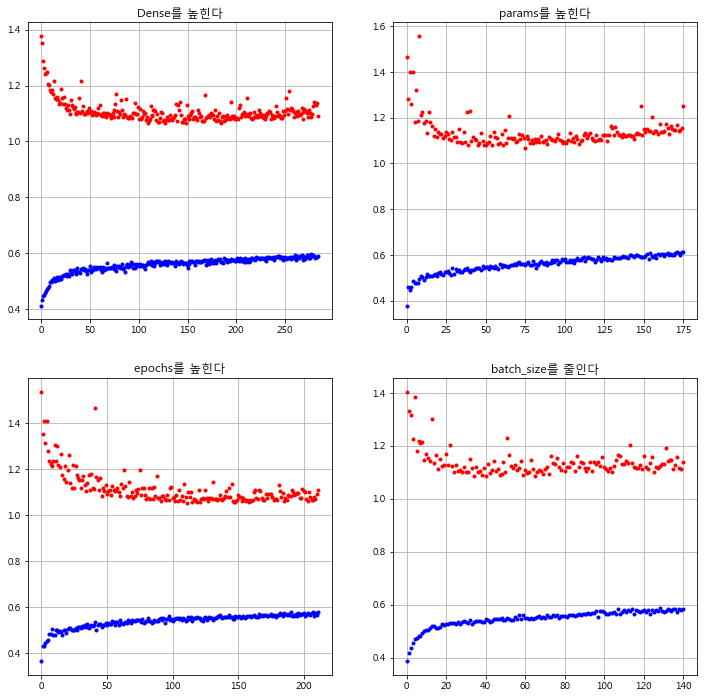

In [321]:
plt.figure(figsize=(12,12))

plt.subplot(221)
y_vloss=history1.history['val_loss']
y_acc=history1.history['acc']
x_len = np.arange(len(y_acc))
plt.title("Dense를 높힌다")
plt.grid()
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.subplot(222)
y_vloss=history2.history['val_loss']
y_acc=history2.history['acc']
x_len = np.arange(len(y_acc))
plt.title("params를 높힌다")
plt.grid()
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.subplot(223)
y_vloss=history3.history['val_loss']
y_acc=history3.history['acc']
x_len = np.arange(len(y_acc))
plt.title("epochs를 높힌다")
plt.grid()
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.subplot(224)
y_vloss=history4.history['val_loss']
y_acc=history4.history['acc']
x_len = np.arange(len(y_acc))
plt.title("batch_size를 줄인다")
plt.grid()
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

### 좋지 못한 모델 같음(밑의 예시에 대한 예측이 많이 틀림)

In [318]:
Y_prediction = model.predict(X_test)
for i in range(10):
    label = np.where(Y_encoded[1]==1)[0][0]
    # np.where(numpy array == a) => numpy array index 찾기
    # 튜플 안의 튜플 값을 꺼내기 위해서 두번 [0][0]사용
    prediction = np.argmax(Y_prediction[i]) 
    # 레이블에서 가장 큰 값이 수치가 됨
    print("원래 등급: {0} 예측된 등급: {1}".format(label, prediction))

원래 등급: 5 예측된 등급: 6
원래 등급: 5 예측된 등급: 6
원래 등급: 5 예측된 등급: 6
원래 등급: 5 예측된 등급: 5
원래 등급: 5 예측된 등급: 6
원래 등급: 5 예측된 등급: 6
원래 등급: 5 예측된 등급: 6
원래 등급: 5 예측된 등급: 6
원래 등급: 5 예측된 등급: 6
원래 등급: 5 예측된 등급: 6
